# Assignment 4

# Question 1

In [4]:
import requests
def error(a,b):
    r = requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "XY"})
    return (float(r.text))

Let's try to find the derivative. We know that: 
   $$ \frac{\partial f}{\partial x} = lim_{h->0} \frac{f(a+h,b) - f(a,b)}{h}$$
   $$ \frac{\partial f}{\partial y} = lim_{h->0} \frac{f(a,b+h) - f(a,b)}{h}$$

In [5]:
def derive (input_, a, b, step = 10**(-6)):
    if (input_ == 'a') : 
        return (error(a+step, b)-error(a,b))/step
    if (input_ == 'b') : 
        return (error(a, b+step)-error(a,b))/step

$$ \nabla f(a,b) \approx \frac{f(a+h,b) - f(a,b)}{h} + \frac{f(a,b+h) - f(a,b)}{h}$$

In [23]:
import random
def update (a,b, step_size = 10**(-1)):
    a = a - step_size * derive ('a', a,b)
    b = b - step_size * derive ('b', a,b)
    return (a,b)

Implement a two-dimensional version of the gradient descent algorithm to find optimal choices of a and b. (7 points) 

In [54]:
from tqdm import tqdm 

def gradient_descent (a=0,b=0, step_size=10**(-6), iterations=40):
    a_hat = a
    b_hat = b
    a_all = []
    b_all = []
    error_all = []  

    for iter in tqdm(range(iterations)):  
        b_hat = random.random()
        a_hat = random.random()
        a_hat, b_hat = update(a_hat, b_hat, step_size)  ###
        error_ = error(a_hat,b_hat)

        a_all.append(a_hat)
        b_all.append(b_hat)
        error_all.append(error_)
        iter = iter+1    

    return (a_all, b_all, error_all)

Explain how you estimate the gradient given that you cannot directly compute the derivative (3 points), identify any numerical choices -- including but not limited to stopping criteria -- you made (3 points), and justify why you think they were reasonable choices (3 points).

The def derive above allowed me to estimate the derivative with the formula previously stated. I decided to use a step_size pretty small and several iterations, it seems like step $10^{-6}$ is pretty reasonable as a small step size for h. 

In [55]:
a_all, b_all, error_all = gradient_descent()

100%|███████████████████████████████████████████| 40/40 [01:17<00:00,  1.93s/it]


First, let's just find the errors for some random values of a and b. Further, we will calculate the global and local minmum.

In [56]:
import pandas as pd
data = {"a": a_all,
        "b": b_all, 
        "error": error_all}

a_b_error = pd.DataFrame(data, columns=data).sort_values(by = "error", ascending = False)
a_b_error

,a,b,error
25,0.931651,0.573175,1.625571
13,0.872702,0.983188,1.617804
39,0.878786,0.711576,1.539794
29,0.079971,0.051829,1.524490
24,0.209922,0.089869,1.458995
18,0.162628,0.109728,1.438405
7,0.818963,0.516739,1.397089
1,0.044994,0.183122,1.385156
30,0.103949,0.177395,1.374295
19,0.064073,0.192263,1.369829


In [57]:
f"It looks like the miminum is around {min(a_b_error['error'])} and it occurs at b = {a_b_error.loc[a_b_error['error'] == min(a_b_error['error']), 'b'].iloc[0]} and a = {a_b_error.loc[a_b_error['error'] == min(a_b_error['error']), 'a'].iloc[0]} "



'It looks like the miminum is around 1.04522393946 and it occurs at b = 0.23727847130979485 and a = 0.814042622666829 '

It so happens that this error function has a local minimum and a global minimum. Find both locations (i.e. a, b values) querying the API as needed (5 points) and identify which corresponds to which (2 point). Briefly discuss how you would have tested for local vs global minima if you had not known how many minima there were. (2 points)

Let's try to find the global minimum and local minimum. 

In [52]:
def gradient_descent_ (a=0,b=0, step_size=10**(-1), iterations=40, error_1= 0, error_2 = 1) :
    a_hat = a
    b_hat = b
    a_hat = round(random.random(),6)
    b_hat = round(random.random(),6)

    while round(error_1, 5) != round(error_2, 5):    ###
        error_1 = error(a_hat,b_hat)
        a_hat, b_hat = update(a_hat, b_hat, step_size)
        error_2 = error(a_hat,b_hat)  

    return (a_hat, b_hat, error_2)

In [53]:
from tqdm import tqdm 

for iter in tqdm(range(6)):
    a_hat,b_hat, error_2 = gradient_descent_()
    print(f"The error is {error_2} and it occurs at a = {a_hat} and b = {b_hat}")

 17%|███████▌                                     | 1/6 [00:34<02:50, 34.08s/it]

The error is 1.10000911896 and it occurs at a = 0.21889999995429393 and b = 0.6881580000267808


 33%|███████████████                              | 2/6 [00:51<01:37, 24.25s/it]

The error is 1.00000062472 and it occurs at a = 0.7115600000038598 and b = 0.16912099999163047


 50%|██████████████████████▌                      | 3/6 [01:11<01:06, 22.22s/it]

The error is 1.00000036941 and it occurs at a = 0.7122400000048488 and b = 0.16925600002046254


 67%|██████████████████████████████               | 4/6 [01:29<00:41, 20.83s/it]

The error is 1.00000057737 and it occurs at a = 0.7118290000355962 and b = 0.1694039999890507


 83%|█████████████████████████████████████▌       | 5/6 [02:20<00:31, 31.48s/it]

The error is 1.1000077314 and it occurs at a = 0.21824099995341784 and b = 0.6873540000617699


100%|█████████████████████████████████████████████| 6/6 [03:03<00:00, 30.60s/it]

The error is 1.10000735537 and it occurs at a = 0.2180820000045876 and b = 0.6907379999498412


Finally, we can see that we have a global minimum of 1 around a = 0.21 and b = 0.69 and a local minimum of 1.1 around a = 0.71 and b = 0.17

# Exercise 2:

In this exercise, we'll look at the distribution of cities across the planet. The same approach would work for disease outbreaks. Begin by downloading the basic (free) data set from https://simplemaps.com/data/world-cities (Links to an external site.) (click the white download button); this data is licensed CC BY 4.0. We will ignore everything except the locations of the cities, which are identified by 'lng' (longitude) and 'lat' (latitude).

Feel free to do the map projections in any way that is correct, but one option is to use cartopy (instructions here.). Here's an example of plotting the locations of three universities:

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv("worldcities.csv")
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


Modify the k-means code (or write your own) from slides8Actions  to use the Haversine metric and work with our dataset (5 points). Note: since this algorithm uses (pseudo)randomness, you'll have to run it multiple times to get a sense of expected runtime.

In [316]:
from math import radians, cos, sin, asin, sqrt, atan2, degrees

def haversine(pts, centers):

    if (type(pts) != tuple) or (type(centers) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = pts[0]
    lon1 = pts[1]

    lat2 = centers[0]
    lon2 = centers[1]

    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2]) 

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

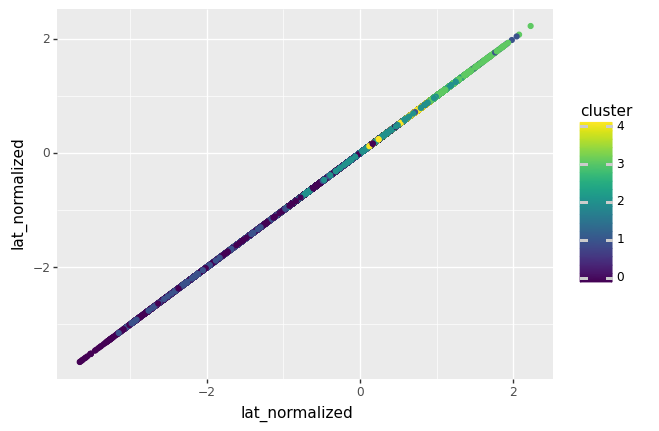

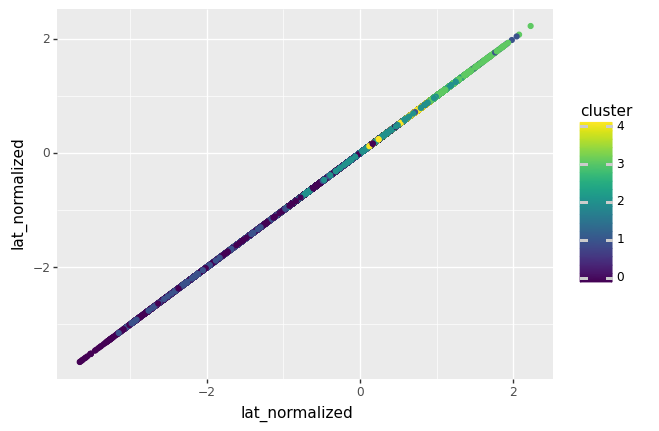

In [317]:
import plotnine as p9
import random
k=5

def normalize(series):
    return (series - series.mean()) / series.std()
df['lat_normalized'] = normalize(df['lat']) 
df['lng_normalized'] = normalize(df['lng'])
pts = tuple([np.array(pt) for pt in zip(df['lat_normalized'], df['lng_normalized'])])
centers = tuple(random.sample(pts, k))
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = 0
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(tuple(pt), tuple(center))
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
df['cluster'] = cluster_ids
cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
for match in range(k)]
centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df, p9.aes(x="lat_normalized", y="lat_normalized", color="cluster")) + p9.geom_point()).draw()

Visualize your results with a color-coded scatter plot (5 points); be sure to use an appropriate map projection (i.e. do not simply make x=longitude and y=latitude; 5 points).

Use this algorithm to cluster the cities data for k=5, 7, and 15. 

In [331]:
centers

[array([ -0.22298097, -25.9859518 ]),
 array([ 36.52268742, -90.07690258]),
 array([43.35167942, 39.41188499]),
 array([ 14.1704499, -63.8096274]),
 array([  4.5523569 , 113.75015687])]

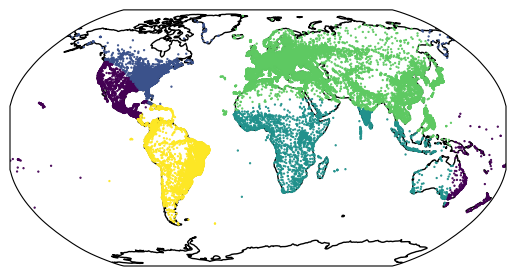

In [338]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

k=5

pts = tuple([np.array(pt) for pt in zip(df['lat'], df['lng'])])
centers = tuple(random.sample(pts, k))
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = 0
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(tuple(pt), tuple(center))
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
df['cluster'] = cluster_ids
cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
for match in range(k)]
centers = [sum(pts)/len(pts) for pts in cluster_pts]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.scatter(df["lng"],df["lat"], c = df['cluster'], s=.4, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

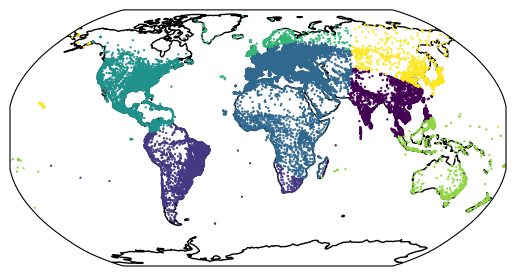

In [466]:
k=7

pts = tuple([np.array(pt) for pt in zip(df['lat'], df['lng'])])
centers = tuple(random.sample(pts, k))
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = 0
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(tuple(pt), tuple(center))
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
df['cluster'] = cluster_ids
cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
for match in range(k)]
centers = [sum(pts)/len(pts) for pts in cluster_pts]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.scatter(df["lng"],df["lat"], c = df['cluster'], s=.4, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

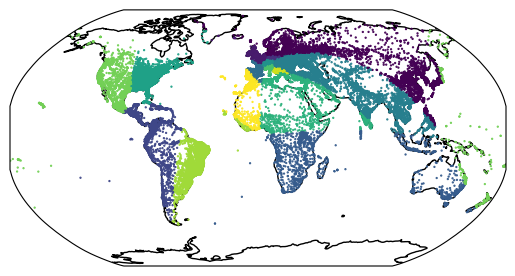

In [463]:
k=15

pts = tuple([np.array(pt) for pt in zip(df['lat'], df['lng'])])
centers = tuple(random.sample(pts, k))
old_cluster_ids, cluster_ids = None, [] # arbitrary but different
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = 0
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = haversine(tuple(pt), tuple(center))
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
df['cluster'] = cluster_ids
cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
for match in range(k)]
centers = [sum(pts)/len(pts) for pts in cluster_pts]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.scatter(df["lng"],df["lat"], c = df['cluster'], s=.4, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

Run it several times to get a sense of the variation of clusters for each k (share your plots) (5 points); comment briefly on the diversity of results for each k. (5 points)

With k = 5, we can see that we have 5 cluster and each cluster in a continent. Indeed, each continent is filled with points of a similar color. Though, as k increases, the number of clusters increases. There are more separations within each continent. 

# Exercise 3:

In class, we discussed two different strategies for computing the Fibonacci sequence: directly with the recursive strategy, and recursive but modified using lru_cache. Implement both (yes, I know, I gave you implementations on the slides, but try to do this exercise from scratch as much as possible) (5 points), time them as functions of n (5 points), and display this in the way you think is best (5 points). Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).

In [500]:
import time
import plotnine as p9
import pandas as pd
from tqdm import tqdm

#Defining the Fibonnacci sequence
def r(n):
    if n in (1, 2):
        return 1
    return r(n - 1) + r(n - 2)

#time for Naive implemtation
def timeit(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        times.append(time.time() - start)
    return min(times)

ns = range(1, 40)
times = [timeit(r, n) for n in tqdm(ns)]

100%|███████████████████████████████████████████| 39/39 [01:25<00:00,  2.20s/it]


Text(0, 0.5, 'time(s)')

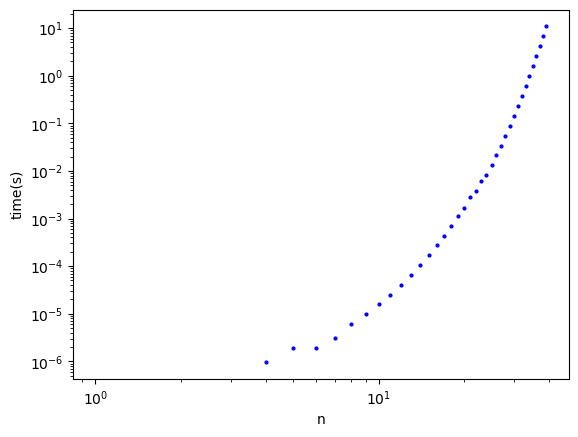

In [501]:
import matplotlib.pyplot as plt
import math
df1 = pd.DataFrame({'n': ns, 'time (s)': times})
plt.scatter(df1['n'], df1['time (s)'], color = 'blue', s=4)
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 
plt.xlabel('n')
plt.ylabel('time(s)')

In [551]:
from functools import lru_cache
#Adding cache
@lru_cache()
#Defining the Fibonnacci sequence
def r(n):
    if n in (1, 2):
        return 1
    return r(n - 1) + r(n - 2)

#time for cache implementation
def timeit(function, *args, n=3):
    times_2 = []
    for i in range(n):
        start = time.time()
        function(*args)
        times_2.append(time.time() - start)
    return min(times_2)

ns = range(1, 40)
times_2 = [timeit(r, n) for n in tqdm(ns)]

100%|████████████████████████████████████████| 39/39 [00:00<00:00, 48814.64it/s]


Text(0, 0.5, 'time(s)')

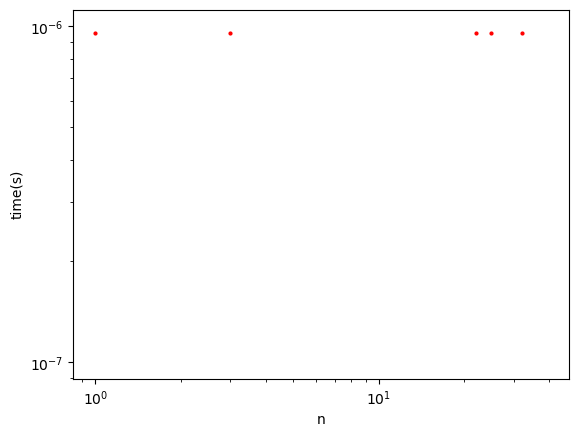

In [552]:
import matplotlib.pyplot as plt
import math
df2 = pd.DataFrame({'n': ns, 'time (s)': times_2})
plt.scatter(df2['n'], df2['time (s)'], color = 'red', s=4)
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 
plt.xlabel('n')
plt.ylabel('time(s)')

By removing the loglog scale, we get:

Text(0, 0.5, 'time(s)')

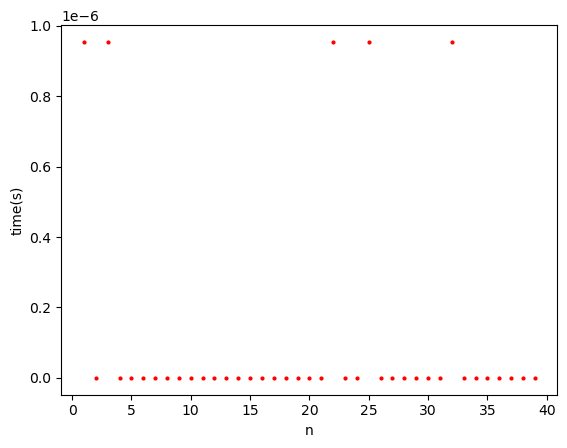

In [553]:
import matplotlib.pyplot as plt
import math
df2 = pd.DataFrame({'n': ns, 'time (s)': times_2})
plt.scatter(df2['n'], df2['time (s)'], color = 'red', s=4)
plt.xlabel('n')
plt.ylabel('time(s)')

We can see that the time is almost 0 using cache (around $10^{-6}$)

Let's plot the difference between the 2 graphs, we expect to get a plot similar to the first one (without cache)

Text(0, 0.5, 'time(s)')

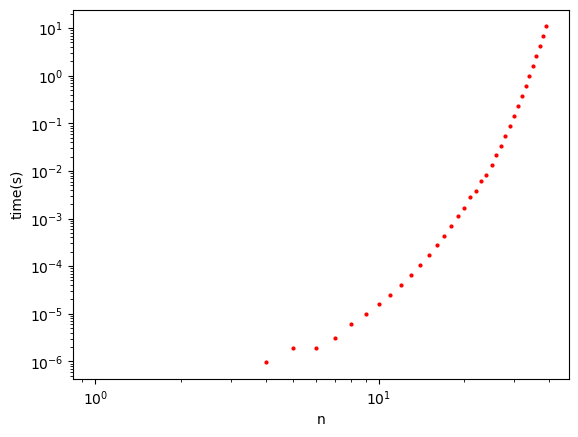

In [554]:
import matplotlib.pyplot as plt
import math
plt.scatter(df1['n'], df1['time (s)'] - df2['time (s)'] , color = 'red', s=4)
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 
plt.xlabel('n')
plt.ylabel('time(s)')

After many iterations, it seems like this n provides reasomable results. Above n=40, the time taken to run the algorithm without cache is too big. Below n=40, the results are ot this satisfying (I get 0 time run using cache). Using this method to plot the results seems to be the easiest and quite efficient. 

# Exercise 4

Implement a function that takes two strings and returns an optimal local alignment (6 points) and score (6 points) using the Smith-Waterman algorithm; insert "-" as needed to indicate a gap (this is part of the alignment points). Your function should also take and correctly use three keyword arguments with defaults as follows: match=1, gap_penalty=1, mismatch_penalty=1 (6 points). Here, that is a penalty of one will be applied to match scores for each missing or changed letter.

First, we can start by building the matrix following the steps the cheatsheet provides as:

In [204]:
import itertools
import numpy as np



#mismatch_penalty - the score we subtract from the total for each mismatching term in the subsequence.

def matrix(a, b, match_score=1, gap_penalty=1, mismatch_penalty=1):
    #We'll start by initializing each score in the grid to zero, 
    #and then update these scores working from the top-left corner and working downwards and to the right.
    H = np.zeros((len(a) + 1, len(b) + 1), int) 
    
    for i, j in itertools.product(range(1, H.shape[0]), range(1, H.shape[1])):
        #match - the score we add to the total for each matching term in the sequence.
        match = H[i - 1, j - 1] + (match_score if a[i - 1] == b[j - 1] else - match_score)
        #gap_penalty - the score we subtract from the total for each horizontal 
        #or vertical gap in the subsequence corresponding to an insertion or deletion mutation.
        delete = H[i - 1, j] - gap_penalty
        insert = H[i, j - 1] - gap_penalty
        #mismatch_penalty - the score we subtract from the total for each mismatching term in the subsequence.
        mismatch= 0
        #of the four possibilities the current cell's new value is the largest
        H[i, j] = max(match, delete, insert, mismatch)
    return H

In [205]:
H = matrix('actagacctagcatcgac', 'tgcatcgagaccctacgtgac')
H

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 3, 2, 1, 1, 1, 2, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 3, 2, 2, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 3, 2, 1, 0, 0, 1, 1, 2, 2, 1, 3, 2],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 4, 3, 2, 1, 0, 2, 1, 1, 1, 2, 4],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 5, 4, 3, 2, 1, 1, 0, 0, 1, 3],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4, 4, 5, 4, 3, 2, 2, 1, 0, 2],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 3, 4, 6, 5, 4, 3, 2, 2, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 3, 5, 5, 6, 5, 4, 3, 2],
       [0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 3, 2, 4, 6, 5, 5, 4, 3, 4],
       [0, 0, 0, 1, 3, 2,

It looks like the matrix is constructed in a right way, we will test it at a later stage using the example provided in the cheatsheet.

Now that the first step is done, we can start the traceback (or backtracking for both sequences as follows:)

In [224]:
#We can see that the square in the last row and the last column has the largest value, 
#so we'll start the backtracking portion of the algorithm from that square.
def backtracking_seq1(H, seq_1, seq_1_='', old_j=0):
    # flip H to get index of **last** occurrence of H.max() with np.argmax()
    H_flip = np.flip(np.flip(H, 0), 1)
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  # (i, j) are **last** indexes of H.max()
    if H[i, j] == 1: 
        return seq_1[i - 1] + seq_1_, i #Here it is just like we had stoped at H[i,j]=0 
                                        #because we stop at 1 and add the last term
    seq_1_ = seq_1[i - 1] + '-' + seq_1_  if old_j - j > 1 else seq_1[i - 1] + seq_1_
    return backtracking_seq1(H[0:i, 0:j], seq_1, seq_1_, j)

In [227]:
def backtracking_seq2(H, seq_2, seq_2_='', old_i=0):
    # flip H to get index of **last** occurrence of H.max() with np.argmax()
    H_flip = np.flip(np.flip(H, 0), 1)
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  # (i, j) are **last** indexes of H.max()
    if H[i, j] == 1:
        return seq_2[j - 1] + seq_2_ , j
    seq_2_ = seq_2[j - 1] + '-'+ seq_2_  if old_i - i > 1 else seq_2[j - 1] + seq_2_
    return backtracking_seq2(H[0:i, 0:j], seq_2, seq_2_, i)

Finally we can combine both results:

In [228]:
def align(seq_1, seq_2, match_score = 1, gap_penalty = 1, mismatch_penalty=1):
    H = matrix(seq_1, seq_2, match_score, gap_penalty)
    return f'seq1 =  {backtracking_seq1(H, seq_1)[0]}', f'seq2 =  {backtracking_seq2(H, seq_2)[0]}', f'score =  {H.max()}'

In [229]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac','actagacctagcatcgac', match_score=1)

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  agacctag-t-gac', 'seq2 =  agacc-ta-gtgac', 'score =  8')

There are several possible results depending on the priority (mismatch or gap_pen). Here, we obtained a result not really far from what wa expected. Though, the calculation of the score is unique and it is correct.

In [221]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', gap_penalty=2)
# there is only one possibility: seq1 = seq2 = gcatcga, score=7
seq1, seq2, score 

('seq1 =  ct-gcatcga', 'seq2 =  ctgcatcga', 'score =  7')

The result obtained is the same! The score and alignment are correct.

Test it, and explain how your tests show that your function works. Be sure to test other values of match, gap_penalty, and mismatch_penalty (7 points).

First, let's test the matrix using the example of the cheatsheet:

In [165]:
H = matrix('GTTACC', 'GTTGAC')
H

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 2, 1, 0, 0, 0],
       [0, 0, 1, 3, 2, 1, 0],
       [0, 0, 0, 2, 2, 3, 2],
       [0, 0, 0, 1, 1, 2, 4],
       [0, 0, 0, 0, 0, 1, 3]])

We obtain the exact same result. Let's try the alignment:

In [164]:
seq1, seq2, score = align('GTTACC', 'GTTGAC', match_score=1)

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  GTT-AC', 'seq2 =  GTTAC', 'score =  4')

Let's try different settings of match_score and gap_penalty:

In [562]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac','actagacctagcatcgac', match_score=1,gap_penalty=3 )

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  gcatcga', 'seq2 =  gcatcga', 'score =  7')

In [563]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac','actagacctagcatcgac', match_score=1,gap_penalty=4 )

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  gcatcga', 'seq2 =  gcatcga', 'score =  7')

We can see that increasing the gap_ doesent't really change the results above gap_pen = 2. By increasing the gap_p, we still get the same results beyond gap_p = 2

Let's see how the match_score could affect the results

In [566]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac','actagacctagcatcgac', match_score=-1,gap_penalty=1 )

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  tgctcgagacc-tagtga', 'seq2 =  act-agacctag-at-cgac', 'score =  14')

In [567]:
seq1, seq2, score = align('tgcatcgagaccctacgtgac','actagacctagcatcgac', match_score=-1,gap_penalty=2 )

# there are several possible results, but one is:
#seq1 = agacccta-cgt-gac
# seq2 = aga-cctagcatcgac
#score = 8 (true for all results)
seq1, seq2, score

('seq1 =  tgcatagacc-ctacg', 'seq2 =  ctaga-cctagtcgac', 'score =  13')

With a match_score = -1, we have a higher score even with a higher gap_penalty